In [8]:
import joypy
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm



### Визуализация тем на Joypy

После лемматизации и создания тем у меня получился датафрейм такого вида:

In [6]:
data.head(3)

,1914-lenta/,url,edition,topics,title,text,topic,text_lema,new_text,date,...,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14
0,1999-08-31 12:00:00,https://lenta.ru/news/1999/08/31/litva/,NaN,"[(1, 0.26349524), (4, 0.11698082), (6, 0.29299...",Литва засудила участников переворота 91 года,Россия крайне негативно оценивает судебный про...,Бывший СССР,россия крайне негативно оценивать судебный про...,"['россия', 'крайне', 'негативно', 'оценивать',...",1999-08-31,...,0.000000,0.292992,0.000000,0.087254,0.081834,0.0,0.000000,0.0,0.066968,0.075940
1,1999-08-31 12:00:00,https://lenta.ru/news/1999/08/31/limonov/,NaN,"[(3, 0.03115067), (5, 0.044526692), (6, 0.0532...",Российские национал-большевики убирают террито...,15 представителей национал-большевистской парт...,Бывший СССР,15 национал-большевистский партия россия разбр...,"['15', 'национал-большевистский', 'партия', 'р...",1999-08-31,...,0.044527,0.053222,0.092884,0.000000,0.053728,0.0,0.134537,0.0,0.290489,0.285615
2,1999-08-31 12:00:00,https://lenta.ru/news/1999/08/31/kirgizia/,NaN,"[(0, 0.014791268), (2, 0.39180875), (4, 0.0188...",Киргизия ведет бои на границах с Таджикистаном...,"На юге Киргизии, а именно в Баткенском и Чон-А...",Бывший СССР,юг киргизия именно баткенский чон-алайскомрайо...,"['юг', 'киргизия', 'именно', 'баткенский', 'чо...",1999-08-31,...,0.000000,0.043198,0.101031,0.387113,0.000000,0.0,0.000000,0.0,0.000000,0.023180


Для визуализации нужны следующие данные:

In [10]:

topic_cols = [col for col in data.columns if 'topic_' in col]
a = data.groupby(['year_month'])[topic_cols].mean()

In [11]:
a=a.reset_index()

In [12]:
a.head()

,year_month,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14
0,1999-08-01,0.004930,0.087832,0.130603,0.010384,0.045279,0.014842,0.129804,0.064638,0.158122,0.045187,0.000000,0.044846,0.000000,0.119152,0.128245
1,1999-09-01,0.083355,0.006062,0.060526,0.037154,0.087301,0.023523,0.146606,0.201686,0.137910,0.068418,0.035100,0.007157,0.011327,0.026194,0.045630
2,1999-10-01,0.082952,0.027724,0.042946,0.041638,0.056801,0.039109,0.201925,0.171174,0.080179,0.038243,0.033678,0.019785,0.041304,0.043113,0.055043
3,1999-11-01,0.077439,0.032444,0.025661,0.061623,0.031379,0.079636,0.163747,0.121539,0.063753,0.049669,0.060888,0.043074,0.035894,0.035109,0.096918
4,1999-12-01,0.076083,0.039506,0.007914,0.062577,0.103735,0.055827,0.182906,0.092934,0.060306,0.047763,0.080528,0.032126,0.048590,0.025032,0.061908


In [16]:
a =a.rename(columns={'topic_0': 'Финансы', 'topic_1': 'Страны Балтии','topic_2': 'СНГ',
                    'topic_3': 'Авиация','topic_4': 'Россия-Белоруссия','topic_5': 'Выборы',
                    'topic_6': 'Правительство РФ','topic_7': 'Происшествия','topic_8': 'Военные операции',
                    'topic_9': 'Россия','topic_10': 'Украина','topic_11': 'Украина - ДНР/ЛНР',
                     'topic_12': 'Грузия','topic_13': 'Протесты на Украине','topic_14': 'Силовые структуры'})

Преобразуем к следующему виду :

In [17]:
df =  a.melt('year_month', var_name='topic', value_name='text')

In [18]:
df.head()

,year_month,topic,text
0,1999-08-01,Финансы,0.004930
1,1999-09-01,Финансы,0.083355
2,1999-10-01,Финансы,0.082952
3,1999-11-01,Финансы,0.077439
4,1999-12-01,Финансы,0.076083


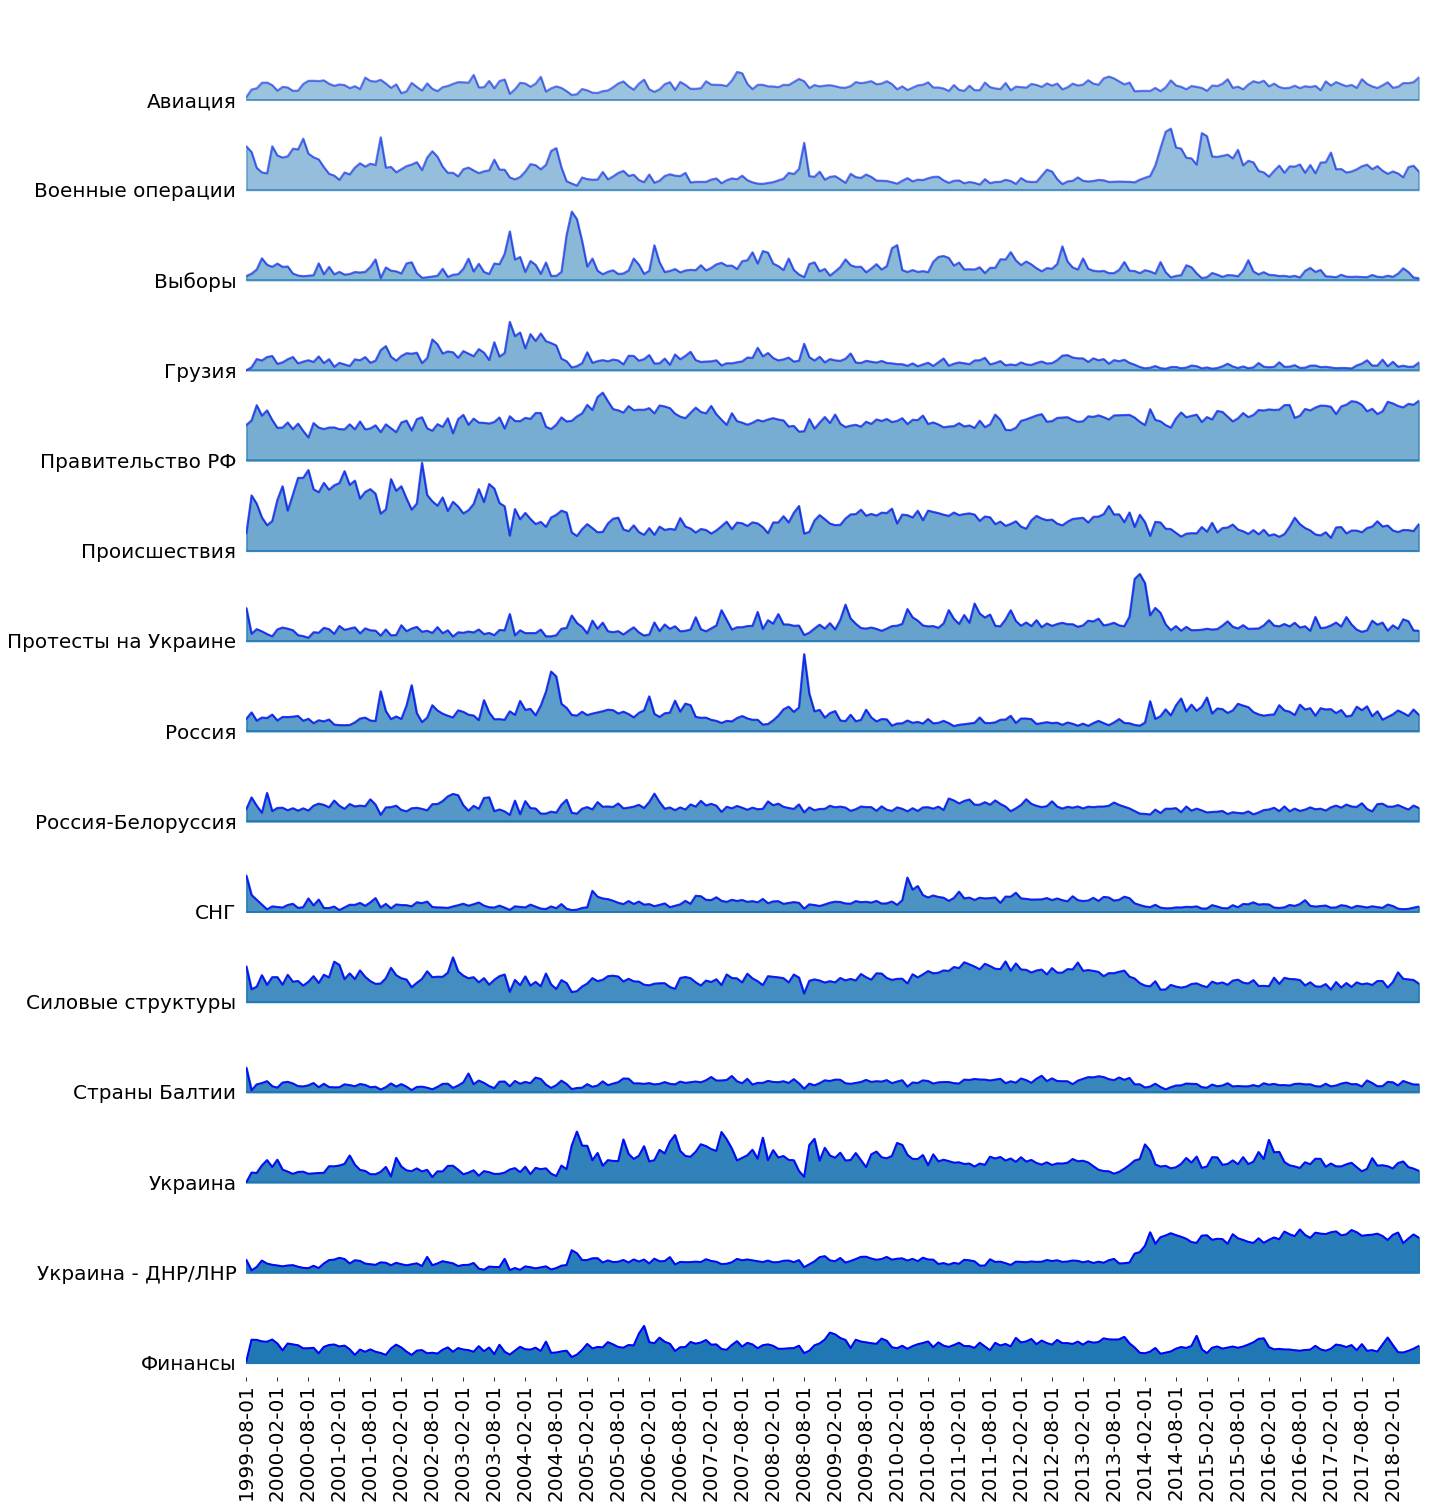

In [19]:

labels = sorted(data['year_month'].unique())
fig, axes = joypy.joyplot(df, by='topic', column='text', figsize=(20, 20),xlabelsize=20,ylabelsize=20
                          ,overlap=0.4,fill=True, linecolor="blue",linewidth=2,
              kind='values', fade=True, xrot=90, x_range=[i for i in range(len(labels))],
                         background='white');

ticks_labels = {i:t for i, t in enumerate(labels)}
axes[-1].set_xticks([k for k, v in ticks_labels.items() if k % 6 == 0])
ticks = axes[-1].get_xticks()
axes[-1].set_xticklabels([ticks_labels.get(i, 'stop') for i in ticks]);
